In [366]:
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

[nltk_data] Downloading package stopwords to /home/aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# data load and check

In [437]:
data = pd.read_csv(os.getenv("HOME")+"/mini_projects/_E-11_summarize/data/news_summary_more.csv")

In [368]:
print(len(data))

98401


In [369]:
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


# data preprocessing

In [370]:
data.nunique() 

headlines    98280
text         98360
dtype: int64

In [371]:
data.drop_duplicates(inplace=True)

In [372]:
len(data)

98379

In [373]:
data.nunique()

headlines    98280
text         98360
dtype: int64

In [374]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [375]:
data.iloc[34652,0]

"'Fearless Girl' statue to face New York Stock Exchange"

In [376]:
data.iloc[34652,1]

"The 'Fearless Girl' statue in New York will be relocated to a spot in front of the New York Stock Exchange, officials said. The bronze statue is currently placed near Wall Street. It was installed there last year to commemorate the International Women's Day and aims to highlight the message of a bigger role for women in the corporate sphere."

# Text Normalization  텍스트 정규화


In [377]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ",len(contractions))

정규화 사전의 수:  120


In [378]:
len(stopwords.words('english'))

179

In [379]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [380]:
#데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower()
    sentence = BeautifulSoup(sentence, "lxml").text
    sentence = re.sub(r'\([^)]*\)', '', sentence)
    sentence = re.sub('"','', sentence)
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
    sentence = re.sub(r"'s\b","", sentence)
    sentence = re.sub("[^a-zA-Z]", " ", sentence)
    sentence = re.sub('[m]{2,}', 'mm', sentence)
    
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

# def preprocess_sentence(sentence):
#     sentence = sentence.lower()
#     sentence = BeautifulSoup(sentence, "lxml").text
#     sentence = re.sub(r'\([^)]*\)', '', sentence)
#     sentence = re.sub('"','', sentence)
#     sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
#     sentence = re.sub(r"'s\b","", sentence)
#     sentence = re.sub("[^a-zA-Z]", " ", sentence)
#     sentence = re.sub('[m]{2,}', 'mm', sentence)
    
#     tokens = ' '.join(word for word in sentence.split())

#     return tokens

In [381]:
clean_text = []

for s in data['text']:
    clean_text.append(preprocess_sentence(s))

In [382]:
clean_headlines = []

for s in data['headlines']:
    clean_headlines.append(preprocess_sentence(s, False))



In [383]:
data['text'] = clean_text
data['headlines'] = clean_headlines

In [384]:
data.replace('', np.nan, inplace=True)

In [385]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [386]:
len(data)

98379

# 훈련데이터 / 테스트데이터 나누기

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.0996452494943
헤드라인의 최소 길이 : 1
헤드라인의 최대 길이 : 16
헤드라인의 평균 길이 : 9.299606623364742


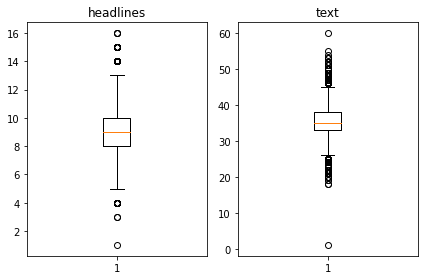

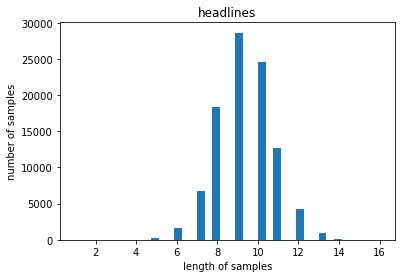

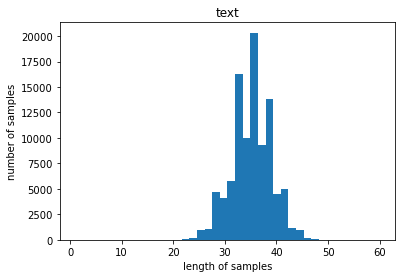

In [387]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(summary_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(summary_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('headlines')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('text')
plt.tight_layout()
plt.show()

plt.title('headlines')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [388]:
text_max_len = 38
headlines_max_len = 10

In [389]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [390]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 38 이하인 샘플의 비율: 0.8163327539413899
전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.8162920948576424


In [391]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 65308


### 토큰 추가

In [321]:

data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
9,cong wins ramgarh bypoll in rajasthan takes to...,congress candidate shafia zubair ramgarh assem...,sostoken cong wins ramgarh bypoll in rajasthan...,cong wins ramgarh bypoll in rajasthan takes to...
10,up cousins fed human excreta for friendship wi...,two minor cousins uttar pradesh gorakhpur alle...,sostoken up cousins fed human excreta for frie...,up cousins fed human excreta for friendship wi...


### data를 numpy array로 변환

In [322]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

### 데이터 섞기

In [323]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[37041 52808 31857 ... 54195 31967 30824]


In [324]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 13061


In [325]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 52247
훈련 레이블의 개수 : 52247
테스트 데이터의 개수 : 13061
테스트 레이블의 개수 : 13061


# vocabulary 만들기

In [326]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [331]:
threshold = 18
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 56215
등장 빈도가 17번 이하인 희귀 단어의 수: 45973
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10242
단어 집합에서 희귀 단어의 비율: 81.78066352397047
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.990340671864951


In [332]:
src_vocab = 10000
src_tokenizer = Tokenizer(num_words = src_vocab) # 단어 집합의 크기를 15,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성.

In [333]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

#잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[26, 906, 1132, 4, 813, 725, 445, 5224, 64, 331, 10, 112, 88, 112, 445, 207, 4, 276, 115, 112, 979, 304, 5693, 1507, 7965, 1415, 188, 332, 112, 1620, 4, 478, 2746, 2779, 228, 445, 126, 530], [144, 1779, 715, 699, 4347, 293, 2187, 490, 1494, 2441, 715, 2245, 144, 982, 398, 22, 7, 699, 3301, 1859, 9320, 6501, 3711, 151, 2047, 6374, 144, 982, 398, 22], [559, 535, 610, 96, 456, 1295, 798, 1597, 1661, 37, 3122, 321, 1222, 4, 27, 630, 219, 27, 855, 798, 10, 6160, 1399, 163, 251, 3633, 399, 69, 5155]]


In [334]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [339]:
threshold = 10
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 25508
등장 빈도가 9번 이하인 희귀 단어의 수: 19558
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5950
단어 집합에서 희귀 단어의 비율: 76.67398463227222
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.792873673910005


In [340]:
tar_vocab = 6000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

#잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 39, 1267, 395, 563, 570, 635, 10, 204, 642, 4227], [1, 220, 2040, 473, 1061, 1726, 965, 342], [1, 807, 157, 284, 658, 458, 5, 1695, 1614], [1, 152, 169, 3889, 4, 337, 280, 1455, 3, 785], [1, 27, 5547, 455, 5, 4062, 9, 1010]]
target
decoder  [[39, 1267, 395, 563, 570, 635, 10, 204, 642, 4227, 2], [220, 2040, 473, 1061, 1726, 965, 342, 2], [807, 157, 284, 658, 458, 5, 1695, 1614, 2], [152, 169, 3889, 4, 337, 280, 1455, 3, 785, 2], [27, 5547, 455, 5, 4062, 9, 1010, 2]]


In [341]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 52246
훈련 레이블의 개수 : 52246
테스트 데이터의 개수 : 13061
테스트 레이블의 개수 : 13061


# 패딩하기

In [342]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = headlines_max_len, padding='post')

# 훈련 모델 설계하기

In [343]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [344]:
# 디코더 설계

decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [345]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 38)]         0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 38, 128)      1280000     input_18[0][0]                   
__________________________________________________________________________________________________
lstm_16 (LSTM)                  [(None, 38, 256), (N 394240      embedding_8[0][0]                
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, None)]       0                                            
___________________________________________________________________________________________

# 어텐션 연결

In [346]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [347]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_18 (InputLayer)           [(None, 38)]         0                                            
__________________________________________________________________________________________________
embedding_8 (Embedding)         (None, 38, 128)      1280000     input_18[0][0]                   
__________________________________________________________________________________________________
lstm_16 (LSTM)                  [(None, 38, 256), (N 394240      embedding_8[0][0]                
__________________________________________________________________________________________________
input_19 (InputLayer)           [(None, None)]       0                                            
___________________________________________________________________________________________

In [348]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
205/205 [==============================] - 60s 291ms/step - loss: 6.0664 - val_loss: 5.5371
Epoch 2/50
205/205 [==============================] - 59s 290ms/step - loss: 5.6304 - val_loss: 5.3722
Epoch 3/50
205/205 [==============================] - 60s 295ms/step - loss: 5.3483 - val_loss: 5.0862
Epoch 4/50
205/205 [==============================] - 60s 294ms/step - loss: 4.9706 - val_loss: 4.7905
Epoch 5/50
205/205 [==============================] - 60s 294ms/step - loss: 4.6382 - val_loss: 4.5906
Epoch 6/50
205/205 [==============================] - 60s 294ms/step - loss: 4.3850 - val_loss: 4.4427
Epoch 7/50
205/205 [==============================] - 60s 295ms/step - loss: 4.1643 - val_loss: 4.3259
Epoch 8/50
205/205 [==============================] - 61s 298ms/step - loss: 3.9709 - val_loss: 4.2291
Epoch 9/50
205/205 [==============================] - 62s 300ms/step - loss: 3.8033 - val_loss: 4.1664
Epoch 10/50
205/205 [==============================] - 61s 296ms/step - l

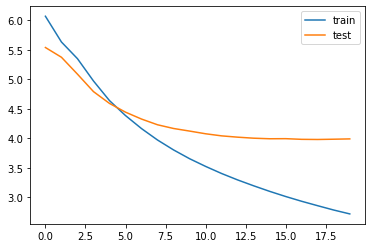

In [349]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 테스트 모델 구현하기

In [350]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [351]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [352]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [353]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

# 테스트

In [354]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [355]:
for i in range(10):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : nawazuddin siddiqui speaking tweet film industry basis skin colour said reply someone film industry nawazuddin explained tweet directed towards entire industry things everywhere bollywood added 
실제 요약 : was reply to someone siddiqui on tweet about skin colour 
예측 요약 :  nawazuddin is an actor


원문 : twitter deleted nearly fake accounts security researchers discovered massive pornographic posting links scam websites offering online sex fake profiles pictures females tweet included sexually explicit phrase prompting users click accompanying accounts reportedly able attract crore 
실제 요약 : twitter deletes fake accounts that offered online sex 
예측 요약 :  twitter bans accounts for porn accounts


원문 : replying rti application ministry home affairs revealed jammu kashmir accounted total human rights violation complaints indian armed forces ministry stated total human rights violation complaints received four years six states 
실제 요약 : human rights complaints against armed forces in rti 
예측 

# 프로젝트 진행 중 의문점

1. 데이터 섞기 코드가 이해 안 간다. **다시 볼 것**    
   
   
2. 내가 이해하기로 어텐션은 인코더에 입력된 모든 단어벡터들의 가중합이 디코더로 전달되고   
    디코더의 각 시점마다 입력되는 것으로 알고 있는데   
    그렇게 되면 결국 사용된 전체 말뭉치를 기반으로 단어를 생성해내는 결과가 나오게 되는 것인가?   
    두번째 시도 결과를 봤을 때 그런 것 같다.   
   
   
    
3. 여기에 쓰인 불용어 사진이 좀 마음에 안든다.   
   일부 인칭대명사나 전치사 등 뉴스 해석에 필수적인 몇몇 품사들까지 다 날려버려서      
   요약 품질이 안 좋은 것이라고 생각했는데   
   추후에 확인해봐야겠다   
   
   
4. 어텐션 모델 자체가 모든 말뭉치를 인코더와 디코더에 사용되는 임베딩 벡터에 쓰는 게 맞다면   
   입력되는 문장의 길이와 출력되는 요약문의 길이를 짧게 설정하는 건 문제가 안되는 것 같다. **맞나?**   
   
   
5. 그럼 데이터 셋 크기만 충분히 늘려주면 요약 품질이 좋아지는 걸까?   
   
   
6. 샘플의 최대길이와 단어의 고정길이 벡터는 다른 거 같은데 후자를 조절하는 방법은 뭘까     


# 각 시도 내용 요약 및 결론

## 첫번째 시도   
   
   
text와 headlines 모두 불용어 제거   
   
text_max_len = 40   
   
headlines_max_len = 8   
   
src_vocab = 20000   
tar_vocab = 10000   
   
   
훈련 데이터의 개수 : 71614   
훈련 레이블의 개수 : 71614   
테스트 데이터의 개수 : 17903   
테스트 레이블의 개수 : 17903   
   
   
embedding_dim = 128   
hidden_size = 256   
   
optimizer='adam'
   
   
Epoch 14/50   
280/280 [==============================] - 92s 328ms/step - loss: 2.9265 - val_loss: 4.2610   

원문 : professor yash pal renowned scientist passed away monday night noida hospital pal awarded padma bhushan padma vibhushan known contribution study cosmic rays tata institute fundamental research also featured famous science series turning point doordarshan   

실제 요약 : veteran scientist professor yash pal passes away    
예측 요약 :  indrani mukerjea died due ganga   


## 두번째 시도      
text와 headlines 모두 불용어 제거 안 함   
   
text_max_len = 63   

headlines_max_len = 11   


src_vocab = 17,000   
tar_vocab = 9000   
   
   
훈련 데이터의 개수 : 71052   
훈련 레이블의 개수 : 71052   
테스트 데이터의 개수 : 17763   
테스트 레이블의 개수 : 17763   
   
   
embedding_dim = 108   
hidden_size = 192   

원문 : economic and political weekly editor has resigned from his position after a legal notice was served by adani group to the academic journal the notice was in regard to a story which allegedly sought to expose an adani group company for earning a tax refund of crore the notice claimed the story was misleading and derogatory    
실제 요약 : editor steps down after legal notice from adani group    
예측 요약 :  india chief quits over defamation case against bcci   

# 세번째 시도   
   
   
headlines만 불용어 제거함 (노드에서 추천한대로...)   
   
text_max_len = 38   
headlines_max_len = 10   
   
src_vocab = 15000   
tar_vocab = 8000   **(단어 집합은 여전히 많다. encoder용은 노드보다 2배, decoder용은 노드보다 4배 많다. 이게 문제일까?)**   
   
   
훈련 데이터의 개수 : 52247   
훈련 레이블의 개수 : 52247   
테스트 데이터의 개수 : 13061   
테스트 레이블의 개수 : 13061   
   
   
embedding_dim = 128   
hidden_size = 256   (하이퍼파라미터도 노드에서 추천한대로...)   
   
205/205 [==============================] - 63s 306ms/step - loss: 2.8719 - val_loss: 4.2886
Epoch 00018: early stopping   
   
   
   
원문 : hackers monday stole crore worth digital currency three minutes victims sending money wrong web address hackers changed address posted company called get funds investors took three minutes realise investors sending funds hackers address    
실제 요약 : hackers steal crore worth digital currency in minutes    
예측 요약 :  hackers steal million worth crore from bitcoin   

원문 : twitter deleted nearly fake accounts security researchers discovered massive pornographic posting links scam websites offering online sex fake profiles pictures females tweet included sexually explicit phrase prompting users click accompanying url accounts reportedly able attract crore    
실제 요약 : twitter deletes fake accounts that offered online sex    
예측 요약 :  twitter apologises for tweeting for unwanted employee   


### 네번째 시도   
   
text_max_len = 38   
headlines_max_len = 10   
   
   
src_vocab = 10000   
tar_vocab = 6000   
   
   
훈련 데이터의 개수 : 52246   
훈련 레이블의 개수 : 52246   
테스트 데이터의 개수 : 13061   
테스트 레이블의 개수 : 13061   
   
205/205 [==============================] - 60s 294ms/step - loss: 2.7202 - val_loss: 3.9902   
Epoch 00020: early stopping   
   
   
   
embedding_dim = 128
hidden_size = 256 
   
   원문 : twitter deleted nearly fake accounts security researchers discovered massive pornographic posting links scam websites offering online sex fake profiles pictures females tweet included sexually explicit phrase prompting users click accompanying accounts reportedly able attract crore    
실제 요약 : twitter deletes fake accounts that offered online sex    
예측 요약 :  twitter bans accounts for porn accounts   

### 세번째 시도와 다른 점은   
src_vocab = 10000   
tar_vocab = 6000  
vocabulary 수를 대폭 줄였다.   
이것만으로도 요약 품질이 나아졌다.   
첫번째 시도와 비교하면 각각 1/2씩 줄인 셈이다.   


## 결론     
   
1. vocabulary 크기가 크면 요약 품질이 좋지 않았다.   
   
   
2. 불용어를 제거해야 요약 품질이 좋아졌다. 하 근데 납득이 안 된다. 거지같은 요약문이 너무 많다.   
   
   
3. 모델을 만들기까지 과정이 복잡하고 지난한 것에 비해 결과가 너무 별로다.   
   컴퓨터는 진짜 멍청한 것 같다   
 
   

# 회고   
   
모델이 어떻게 구성되어 있는지 이해하는 것과      
그것을 실제로 구현하는 것과      
그 결과 나오는 성능을 끌어 올리는 게      
어째서 다 따로 노는 걸까      
   
NLP노드에만 집중하기로 했는데도      
이번 프로젝트에서 별로 한 게 없다.   
계속해서 수박 겉핱기만 하고 있다.   
두달 동안 바뀐게 아무것도 없다.   
   
추상적 요약이 안되니까   
추출적 요약은 하기도 싫다   
Summa가 어떤 원리로 돌아가는 모델인진 모르겠지만   
이 뉴스 데이터는 추출적 요약에 적합한 데이터도 아니다.   
안해봐도 뻔하다   
   
   

